In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')


In [35]:
data = pd.read_csv('data.csv')
#drop 'X' column
data = data.iloc[: , 1:]
data.head()

,title,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,emo,ins
0,"Hey, Soul Sister",Train,neo mellow,2010,97.0,89.0,67.0,NaN,8.0,80.0,217.0,19.0,4.0,83.0,16.920,92.16
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82.0,30.456,73.92
2,TiK ToK,Kesha,dance pop,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80.0,24.534,82.56
3,Bad Romance,Lady Gaga,dance pop,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,NaN,24.534,92.16
4,Just the Way You Are,Bruno Mars,pop,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78.0,48.222,92.16


In [107]:
data[['emo', 'val']]

,emo,val
0,16.920,80.0
1,30.456,64.0
2,24.534,71.0
3,24.534,71.0
4,48.222,43.0
...,...,...
598,71.064,16.0
599,32.994,61.0
600,29.610,65.0
601,64.296,24.0


In [103]:
len(data['top.genre'].unique())

50

In [37]:
data.info()
print("There are small portion of missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      603 non-null    object 
 1   artist     603 non-null    object 
 2   top.genre  603 non-null    object 
 3   year       603 non-null    int64  
 4   bpm        598 non-null    float64
 5   nrgy       600 non-null    float64
 6   dnce       596 non-null    float64
 7   dB         597 non-null    float64
 8   live       597 non-null    float64
 9   val        591 non-null    float64
 10  dur        601 non-null    float64
 11  acous      595 non-null    float64
 12  spch       599 non-null    float64
 13  pop        596 non-null    float64
 14  emo        603 non-null    float64
 15  ins        603 non-null    float64
dtypes: float64(12), int64(1), object(3)
memory usage: 75.5+ KB
There are small portion of missing values


In [38]:
#replacing missing values by the mean
for i in range(16):
    missing_indx = data[data[data.columns[i]].isnull()].index.tolist()
    if len(missing_indx)>0:
        meann = data[data.columns[i]].mean()
        for j in missing_indx:
            data[data.columns[i]][j]=meann
data.info()
print("All missing values are replaced by the mean")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      603 non-null    object 
 1   artist     603 non-null    object 
 2   top.genre  603 non-null    object 
 3   year       603 non-null    int64  
 4   bpm        603 non-null    float64
 5   nrgy       603 non-null    float64
 6   dnce       603 non-null    float64
 7   dB         603 non-null    float64
 8   live       603 non-null    float64
 9   val        603 non-null    float64
 10  dur        603 non-null    float64
 11  acous      603 non-null    float64
 12  spch       603 non-null    float64
 13  pop        603 non-null    float64
 14  emo        603 non-null    float64
 15  ins        603 non-null    float64
dtypes: float64(12), int64(1), object(3)
memory usage: 75.5+ KB
All missing values are replaced by the mean


C:\Users\smaza\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
data["top.genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
australian dance               6
hip pop                        6
edm                            5
australian pop                 5
atl hip hop                    5
latin                          4
permanent wave                 4
hip hop                        4
colombian pop                  3
tropical house                 3
electro                        2
detroit hip hop                2
electronic trap                2
belgian edm                    2
indie pop                      2
folk-pop                       2
baroque pop                    2
canadian hip hop               2
acoustic p

The dataset is heavily skewed towards 'dance pop' (327 songs; 54% of 603 sogns in total).


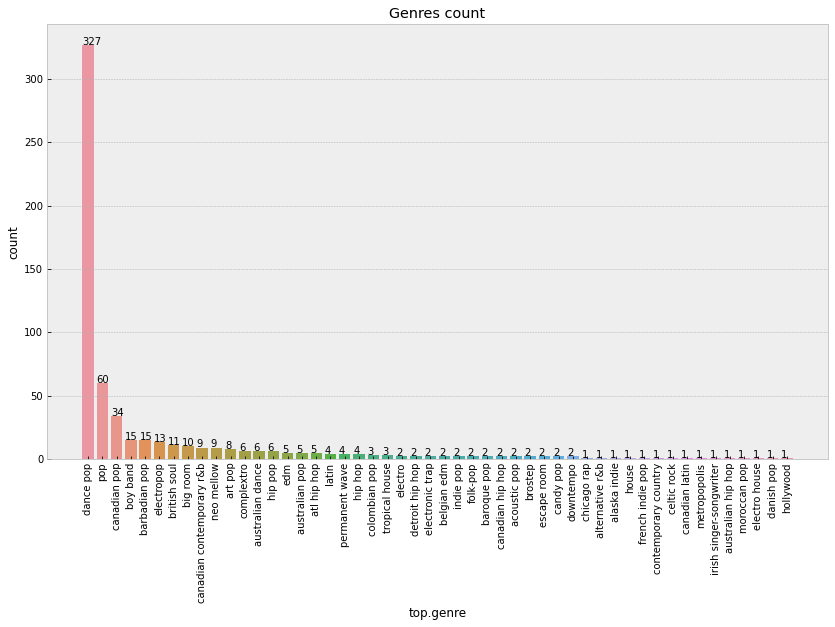

In [62]:
#Genres 
plt.figure(figsize=(14,8))
g = sns.countplot(x="top.genre", data=data, order = data["top.genre"].value_counts().index)
for p, label in zip(g.patches, data["top.genre"].value_counts()):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))
g.set_title("Genres count")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.plot()
print("The dataset is heavily skewed towards 'dance pop' (327 songs; 54% of 603 sogns in total)")

In [73]:
data['artist'][data["artist"].value_counts().values>8]

IndexError: Boolean index has wrong length: 184 instead of 603

The dataset is heavily skewed towards 'dance pop' (327 songs; 54% of 603 sogns in total)


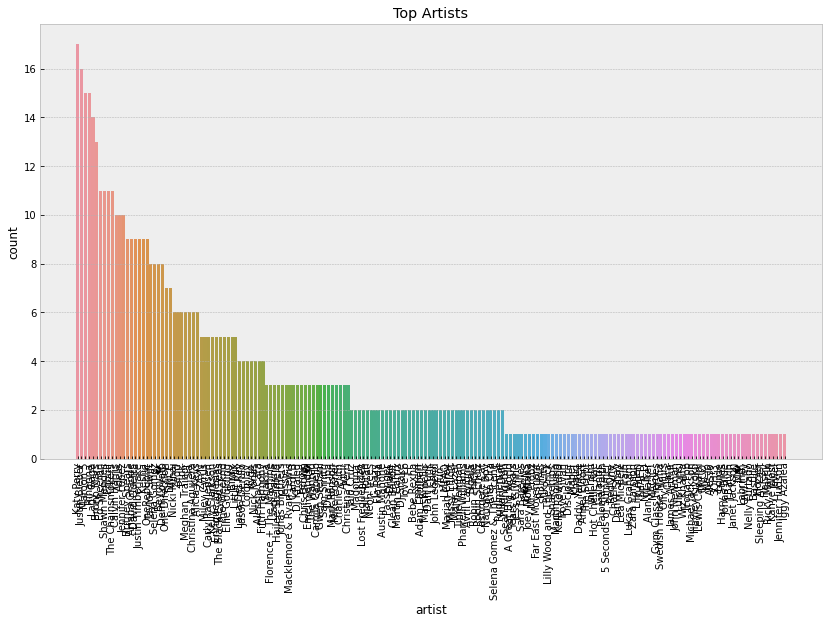

In [64]:
#Artists
top_artists =  data['artist']
plt.figure(figsize=(14,8))
g = sns.countplot(data, order = data["artist"].value_counts().index)
# for p, label in zip(g.patches, data["artist"].value_counts()):
#     g.annotate(label, (p.get_x(), p.get_height()+0.15))
g.set_title("Top Artists")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.plot()
print("The dataset is heavily skewed towards 'dance pop' (327 songs; 54% of 603 sogns in total)")

In [94]:
#Correlation between variables
corr = data.corr().to_numpy()
for i in range(13):
    t = np.argsort(corr[i])[-2]
    print(data.columns[3:][i], data.columns[3:][t], corr[i][t])

print("There are no positive pair-correlated variables !")

year pop 0.2396624152384335
bpm dB 0.17889822529376564
nrgy dB 0.5347816424061204
dnce val 0.48681538809418234
dB nrgy 0.5347816424061204
live nrgy 0.18519950612336963
val dnce 0.48681538809418234
dur emo 0.2619939232971698
acous emo 0.2508751799030843
spch live 0.1473834406785469
pop year 0.2396624152384335
emo dur 0.2619939232971698
ins emo 0.12201258781435836


In [119]:
#Correlation between variables
corr = data.corr().to_numpy()
for i in range(13):
    t = np.argsort(corr[i])[0]
    print(data.columns[3:][i], data.columns[3:][t], corr[i][t])

print("There are two negative pair-correlated variables :")
print("val with emo,")
print("ins with spch")

year nrgy -0.2271598241767925
bpm dnce -0.1355741432993245
nrgy acous -0.5608753896823241
dnce emo -0.49593875441159396
dB emo -0.2796703069143625
live ins -0.14743410254977782
val emo -0.9855712674092734
dur val -0.25911242565997883
acous nrgy -0.5608753896823241
spch ins -0.9994266202454958
pop dur -0.10310047692877844
emo val -0.9855712674092734
ins spch -0.9994266202454958
There are two negative pair-correlated variables :
val with emo,
ins with spch


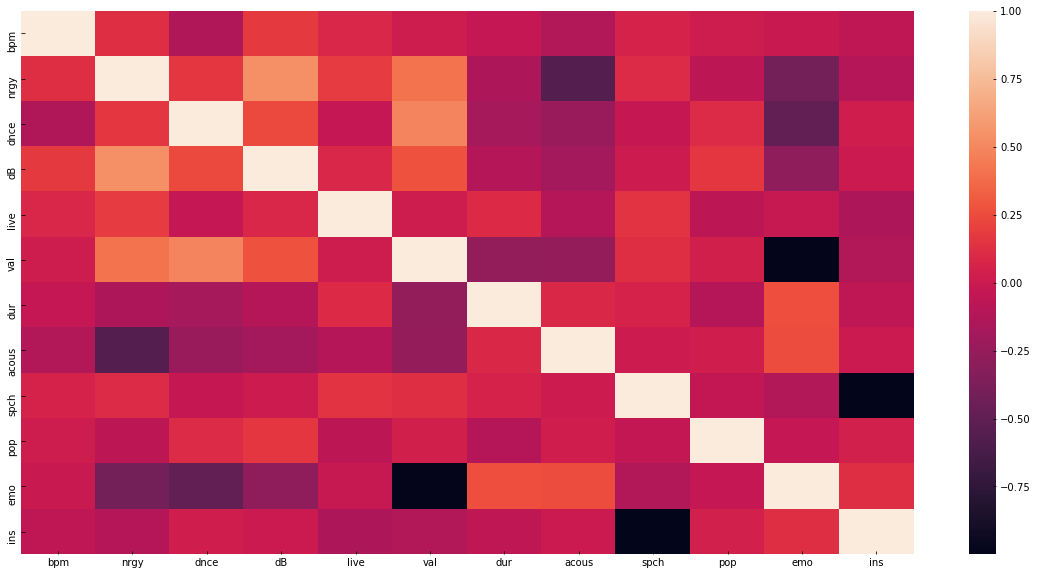

In [117]:
plt.figure(figsize=(20,10))
sns.heatmap(data[data.columns[4:]].corr())